In [1]:
# viz pkgs
import pickle
import string
from collections import Counter

import matplotlib as mpl
import matplotlib.legend as mlegend
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import nltk

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import gridspec
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# plt.style.use("fivethirtyeight")
plt.rcParams["font.serif"] = "Times New Roman"

# sns.set_theme(
#     context="notebook",
#     style="darkgrid",
#     palette="deep",
#     font="sans-serif",
#     font_scale=1,
#     color_codes=True,
#     rc=None,
# )
mpl.rcParams.update(mpl.rcParamsDefault)

In [2]:
nltk.download("stopwords")

# stopwords
stopwords_set = set(stopwords.words("english"))

# update stopwords set
stopwords_set.update(
    [
        "s",
        "will",
        "amp",
        "must",
        "rt",
        "american",
        "americans",
        "re",
        "000",
        "today",
        "us",
        "day",
        "get",
        "let",
        "done",
        "across",
        "country",
        "last",
        "week",
    ]
)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/denniesbor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## N-grams

In [3]:
df = pd.read_csv("raw_tweets.csv")

In [4]:
# plot of the top ngrams
def get_top_ngram(df, n=None, range=20):
    """Function that sorts top ngrams in descending order"""

    vec = CountVectorizer(ngram_range=(n, n), stop_words=stopwords_set).fit(
        df.clean_text
    )
    bag_of_words = vec.transform(df.clean_text)

    vec_dem = CountVectorizer(ngram_range=(n, n), stop_words=stopwords_set).fit(
        df.query("party == 'D'")["clean_text"]
    )
    vec_rep = CountVectorizer(ngram_range=(n, n), stop_words=stopwords_set).fit(
        df.query("party == 'R'")["clean_text"]
    )

    bag_of_words_dem = vec_dem.transform(df.query("party == 'D'")["clean_text"])
    bag_of_words_rep = vec_rep.transform(df.query("party == 'R'")["clean_text"])

    sum_words = bag_of_words.sum(axis=0)
    sum_words_rep = bag_of_words_rep.sum(axis=0)
    sum_words_dem = bag_of_words_dem.sum(axis=0)

    vocabs_dem = vec_dem.vocabulary_
    vocabs_rep = vec_rep.vocabulary_

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # return words_freq,vocabs_rep,vocabs_dem, sum_words_rep, sum_words_dem
    word_list = []
    for word, total in words_freq[:range]:

        try:
            word_dict = {
                "word": word,
                "total": total,
                "D": sum_words_dem[0, vocabs_dem[word]],
                "R": sum_words_rep[0, vocabs_rep[word]],
            }
            word_list.append(word_dict)
        except:
            pass

    return word_list

### Visualize most occurring words

In [5]:
# plot the n-grams in a barchart
def plot_top_ngrams_barchart(grams: list, n=10):

    """Function to plot ngrams.

    Parameters:
    ------------
    input: list

    Returns
    ------------
    output: map obj
    """
    grams = grams[:n]
    x, y = map(list, zip(*grams))

    return x, y

### Plot the N-grams

In [6]:
# get the tri-grams of in the tweets

# uni_grams = get_top_ngram(df, n=1, range=20)
# bigrams = get_top_ngram(df, n=2, range=20)
# tri_grams = get_top_ngram(df, n=3, range=20)
# four_grams = get_top_ngram(df, n=4, range=20)


# n_grams = [uni_grams, bigrams, tri_grams, four_grams]

In [5]:
n_grams = []
# save to a pickle file
if n_grams:
    with open("n-grams.txt", "wb") as file:
        pickle.dump(n_grams, file)

# load pickle
if not n_grams:
    with open("n-grams.txt", "rb") as file:
        n_grams = pickle.load(file)

In [12]:
#  ascii letters
str_list = string.ascii_uppercase

# titles
titles = ["Unigrams", "Bigrams", "Trigrams", "Fourgrams"]


def custom_plot(ngrams, ax, n):

    tff = pd.DataFrame(ngrams[:10])

    ax.set_facecolor("#D3D3D3")
    ax.patch.set_alpha(0.4)

    # grid lines based on major tick
    ax.grid(which="major", color="w", linestyle="-", linewidth=1)

    # set axis below
    ax.set_axisbelow(True)

    kwargs = dict(left=tff.D, color="r")

    sns.barplot(y=tff.word, x=tff.D, color="b", alpha=0.7)
    plt.yticks(fontsize=9)
    sns.barplot(y=tff.word, x=tff.R, **kwargs, alpha=0.7)

    # plt.xticks(fontsize=10)
    ax.set_yticklabels(
        labels=[f'"{word}"' if len(word.split()) > 1 else word for word in tff.word],
        fontsize=10,
        ha="right",
    )

    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_title(f"({str_list[n]}) {titles[n]}", fontsize=10)

    # Hide the right and top spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.left.set_visible(False)
    ax.spines.bottom.set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position("left")
    ax.xaxis.set_ticks_position("bottom")

    # Minor ticks
    ax.set_yticks(np.arange(-0.5, 10, 1), minor=True)

    # grid lines based on minor tick
    ax.grid(which="minor", color="w", linestyle="-", linewidth=1, alpha=1)

    # Remove minor ticks
    ax.tick_params(which="minor", bottom=False, left=False)

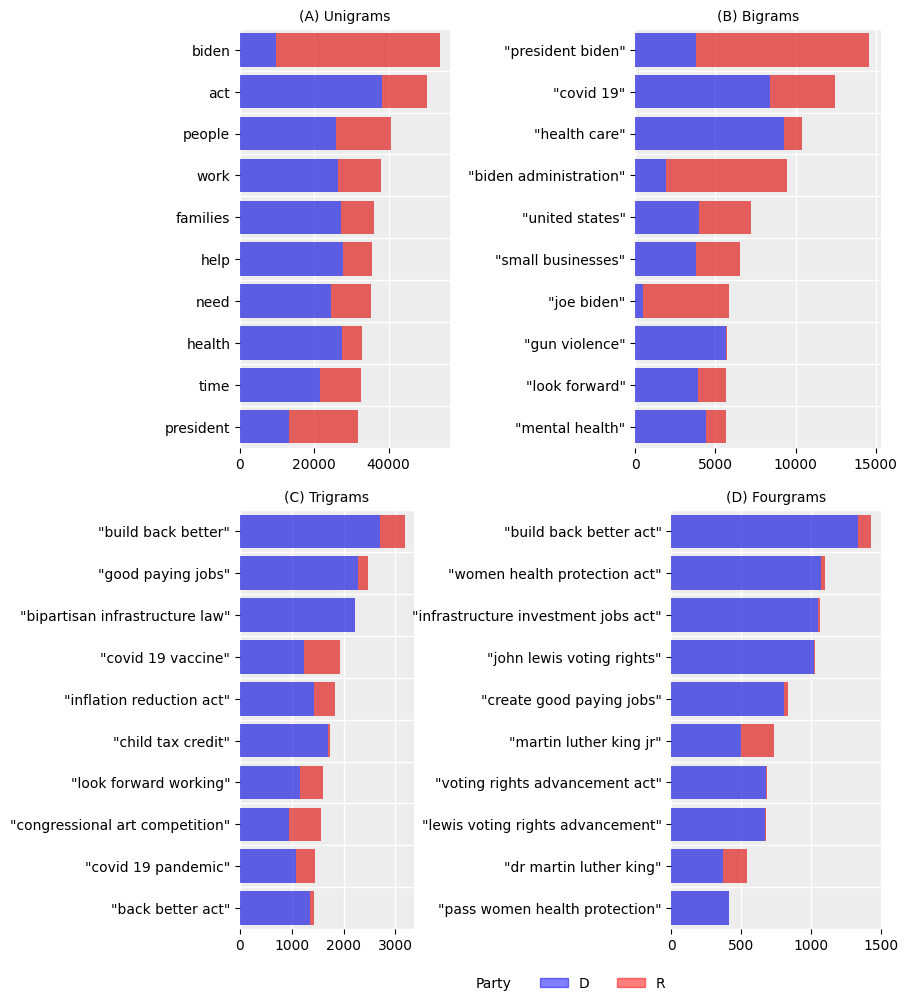

In [13]:
fig = plt.figure(1, figsize=(8.27, 11.69), dpi=100)
gs = gridspec.GridSpec(2, 18)

for i in range(4):

    if i == 0:
        ax = plt.subplot(gs[0, 0:6])
    if i == 1:
        ax = plt.subplot(gs[0, 11:])
    if i == 2:
        ax = plt.subplot(gs[1, 0:5])
    if i == 3:
        ax = plt.subplot(gs[1, 12:])

    custom_plot(n_grams[i], ax, i)


#     legends
title = mpatches.Patch(color="white", label="Party", alpha=0.5)
red_patch = mpatches.Patch(color="red", label="R", alpha=0.5)
blue_path = mpatches.Patch(color="blue", label="D", alpha=0.5)

leg1 = ax.legend(
    handles=[title, blue_path, red_patch],
    bbox_to_anchor=(-0.0, -0.1),
    borderaxespad=0,
    ncol=3,
    frameon=False,
)

ax.patch.set_alpha(0.4)

plt.subplots_adjust(hspace=0.15)

plt.show()

fig.savefig(
    "/home/denniesbor/Dropbox/twitter_nlp_project2/assets/ngram_plots.png",
    dpi=100,
    bbox_inches="tight",
)

**From the charts above, it's clear that with n-grams, we can identify the topics within the tweets. From this, we can use these words to query for the tweets belonging to a particular topic of interest. First, we export these bigrams and trigrams into a CSV file and add a new column called topic category. We are interested in unique words for a particular discussion.**

## Latent Dirichlet Allocation (LDA)

LDA topic modelling discovers hidden (latent) topics in text documents. It does this by inferring possible topics based on the words in the documents using a generative probabilistic model and Dirichlet distributions.
LDA allows us to efficiently analyze large volumes of text by clustering documents into topics.

LDA makes the following assumptions:

1. Documents are probability distributions over topics.
2. Topics are probability distributions over words.

In [13]:
from sklearn.decomposition import LatentDirichletAllocation

In [14]:
# text pre-processing
cv = CountVectorizer(max_df=0.9, min_df=5, stop_words="english")

# document term matrix
dtm = cv.fit_transform(df["clean_text"])
dtm

<566972x36743 sparse matrix of type '<class 'numpy.int64'>'
	with 9168411 stored elements in Compressed Sparse Row format>

In [15]:
# assign number of topics
topics = 10

# Define model
LDA = LatentDirichletAllocation(n_components=topics, random_state=42)

# Fit model
LDA.fit(dtm)

LatentDirichletAllocation(random_state=42)

In [16]:
# assign number of words
word_count = 15

# loop to print top 15 words for 3 topics
for i, topic in enumerate(LDA.components_):
    print(
        "The top  {word_count} word for topic # {i} is:".format(
            word_count=word_count, i=i
        )
    )
    print(
        [cv.get_feature_names_out()[index] for index in topic.argsort()[-word_count:]]
    )
    print("\n")

The top  15 word for topic # 0 is:
['mental', 'today', 'pandemic', 'need', 'workers', 'women', 'veterans', 'access', '19', 'vaccine', 'amp', 'act', 'covid', 'care', 'health']


The top  15 word for topic # 1 is:
['assistance', 'check', 'hall', 'student', 'information', 'amp', 'town', 'students', 'join', 'learn', 'visit', 'school', 'help', 'today', 'office']


The top  15 word for topic # 2 is:
['meeting', 'county', 'proud', 'week', 'discuss', 'new', 'national', 'support', 'ukraine', 'today', 'thank', 'work', 'community', 'great', 'amp']


The top  15 word for topic # 3 is:
['community', 'families', 'safety', 'enforcement', 'lost', 'act', 'communities', 'law', 'police', 'today', 'safe', 'gun', 'lives', 'amp', 'violence']


The top  15 word for topic # 4 is:
['los', 'para', 'joe', 'security', 'en', 'afghanistan', 'el', 'illegal', 'la', 'southern', 'president', 'crisis', 'administration', 'border', 'biden']


The top  15 word for topic # 5 is:
['president', 'policies', 'year', 'families',

### Conclusion

From the n-grams and LDA, we can visualize the most conspicuous topics with the dataset. The next step is to group the topics into two categories - social and geopolitical policies. In these categories exists subgroups such as inflation, climate change, Ukraine-Russia, women's reproductive rights, LGBTQ, etc. We create a CSV file from the bigrams and tri-grams and assign each word tuple to a category, also a topic. These words are useful in querying the dataset. From this, we shall create a  JSON file with the following structure.
<br />
```python
{
    "Social Policies": {"topic": ["keywords"]},
    "Geo Political Policies": {"topic": ["keywords"]},
}
```
<br />
For example
<br />

```python
{
    "Social Policies": {
        "women health, and rights": [
            "abortion",
            "maternal",
            "momnibus",
        ],
        "guns and assault weapons": [
            "guns",
            "arms",
        ],
    },
    "Geo Political Policies": {
        "ukraine russia": [
            "vladimir",
            "invasion",
            "supplemental",
        ],
    },
}
```
<br />
Save this as a JSON file for use in the next section.